# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

from scipy import stats
from scipy.stats import shapiro 

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 2. Collect and load data

In [4]:
df=pd.read_csv('bigcity.csv',index_col=[0])
df.head()


,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [5]:
df.columns

Index(['u', 'x'], dtype='object')

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

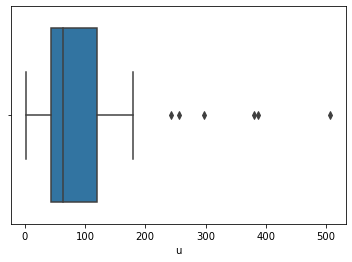

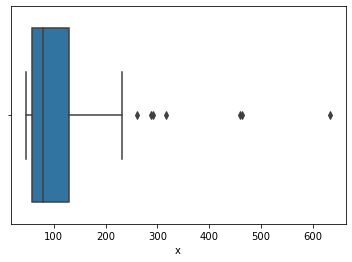

In [6]:
sns.boxplot(df['u'])
plt.show()
sns.boxplot(df['x'])
plt.show()

In [7]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

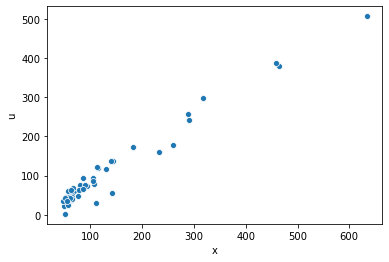

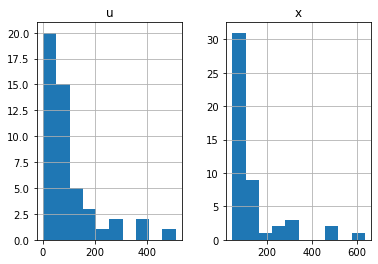

In [11]:
sns.scatterplot(df['x'],df['u'])
plt.show()
df.hist(bins=10)
plt.show()

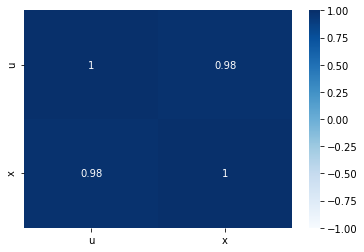

In [10]:
cor=df.corr()
sns.heatmap(cor,vmin=-1,vmax=1,annot=True,cmap='Blues')
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [14]:
x=df['u']
y=df['x']
slr_model=sm.OLS(x,y).fit()
print(slr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      u   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2566.
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                    2.49e-43
Time:                        17:36:28   Log-Likelihood:                         -215.79
No. Observations:                  49   AIC:                                      433.6
Df Residuals:                      48   BIC:                                      435.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [15]:
print(df.isnull().sum().sum())
print(df.corr())

0
          u         x
u  1.000000  0.981742
x  0.981742  1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39,)
(39,)
(10,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [26]:
x = sm.add_constant(x)
lin_reg=LinearRegression()
lr_model = lin_reg.fit(x,y)
#sgd_model = sgd.fit(x,y)
print(list(zip(lr_model.coef_,x.columns)))
print(lr_model.intercept_)

[(0.0, 'const'), (1.1577337039322444, 'u')]
8.3839563331926


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

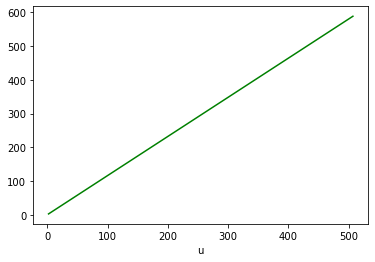

In [39]:
y1=1.1577*x['u']+x['const']
x1=x['u']
sns.lineplot(x1,y1,color='g')
plt.show()

#it is linear because they are strong positive correlated

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [50]:
x = df['u']
y = df['x']
x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10, test_size=0.3)
model = sm.OLS(y,x).fit()
res = model.resid
y_pred = model.predict(x)

rmse_total = np.sqrt(mean_squared_error(y_pred, y))
rmse_train = np.sqrt(mean_squared_error(model.predict(x_train), y_train))
rmse_test = np.sqrt(mean_squared_error(model.predict(x_test), y_test))

r2_total=r2_score(y_pred, y)
r2_train=r2_score(model.predict(x_train), y_train)
r2_test=r2_score(model.predict(x_test), y_test)
print(rmse_total,rmse_train,rmse_test)
print(r2_total,r2_train,r2_test)

# rmse_test > rmse_train. hence, it is overfit.

23.179613486957937 22.12409756770989 25.41030764673366
0.9624589193332477 0.973662911934018 0.7153621611278212


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [51]:
rg = Ridge()
rg.fit(x_train, y_train)
rg.fit(x_test, y_test)


Ridge()

In [53]:
print('train score ',rg.score(x_train, y_train))
print('test score ',rg.score(x_test, y_test))

train score  0.9735087189791471
test score  0.7845853415497815
